In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from scipy import stats
from statsmodels.formula.api import ols
import plotly.plotly as py
import plotly.tools as tls
import plotly.figure_factory as ff

In [2]:
# Read data
Healthcare = pd.read_excel('US_Healthcare.xls')
Healthcare.head()

,Code,Location,2014_Health_Spending,2013_Health_Spending,2012_Health_Spending,2011_Health_Spending,2010_Health_Spending,2014_Smoking,2013_Smoking,2012_Smoking,...,2012_Middle_Adult,2012_Senior,2011_Childhood,2011_Young_Adult,2011_Middle_Adult,2011_Senior,2010_Childhood,2010_Young_Adult,2010_Middle_Adult,2010_Senior
0,AL,Alabama,7281,6996,6821,6541,6421,0.277492,0.275937,0.279381,...,0.333597,0.145011,0.262335,0.261991,0.335629,0.140044,0.262335,0.261991,0.335629,0.140044
1,AK,Alaska,11064,10428,10130,9586,9129,0.258841,0.283277,0.275062,...,0.336201,0.085547,0.288477,0.289677,0.341236,0.080610,0.288477,0.289677,0.341236,0.080610
2,AZ,Arizona,6452,6262,6183,6076,6027,0.247508,0.247197,0.240968,...,0.308862,0.148056,0.278136,0.268408,0.311266,0.142190,0.278136,0.268408,0.311266,0.142190
3,AR,Arkansas,7408,6929,6804,6585,6412,0.274475,0.284254,0.279754,...,0.320987,0.149936,0.269665,0.261095,0.323750,0.145490,0.269665,0.261095,0.323750,0.145490
4,CA,California,7549,7256,7018,6737,6480,0.227492,0.227698,0.227746,...,0.320562,0.120984,0.275004,0.286686,0.321617,0.116693,0.275004,0.286686,0.321617,0.116693


In [3]:
# Calculate the mean 
Health_Spending_mean = Healthcare[["2014_Health_Spending", "2013_Health_Spending", "2012_Health_Spending", "2011_Health_Spending", \
                                  "2010_Health_Spending"]].mean(axis=1)
Healthcare["Health_Spending_Average"]=Health_Spending_mean
Healthcare.head()
Smoking_mean = Healthcare[["2014_Smoking","2013_Smoking","2012_Smoking","2011_Smoking","2010_Smoking"]].mean(axis=1)
Healthcare["Smoking_Average"]=Smoking_mean
Income_mean = Healthcare[["2014_Income","2013_Income","2012_Income","2011_Income","2010_Income"]].mean(axis=1)
Healthcare["Income_Average"]=Income_mean
GDP_mean = Healthcare[["2014_GDP","2013_GDP","2012_GDP","2011_GDP","2010_GDP"]].mean(axis=1)
Healthcare["GDP_Average"]=GDP_mean
Male_mean = Healthcare[["2014_Male","2013_Male","2012_Male","2011_Male","2010_Male"]].mean(axis=1)
Healthcare["Male_Average"] = Male_mean
Female_mean = Healthcare[["2014_Female","2013_Female","2012_Female","2011_Female","2010_Female"]].mean(axis=1)
Healthcare["Female_Average"] = Female_mean
Childhood_mean = Healthcare[["2014_Childhood","2013_Childhood","2012_Childhood","2011_Childhood","2010_Childhood"]].mean(axis=1)
Healthcare["Childhood_Average"] = Childhood_mean
Young_Adult_mean = Healthcare[["2014_Young_Adult","2013_Young_Adult","2012_Young_Adult","2011_Young_Adult","2014_Young_Adult","2014_Young_Adult"]].mean(axis=1)
Healthcare["Young_Adult_Average"] = Young_Adult_mean
Middle_Adult_mean = Healthcare[["2014_Middle_Adult", "2013_Middle_Adult", "2012_Middle_Adult", "2011_Middle_Adult", "2010_Middle_Adult"]].mean(axis=1)
Healthcare["Middle_Adult_Average"] = Middle_Adult_mean
Senior_mean = Healthcare[["2014_Senior","2013_Senior","2012_Senior","2011_Senior","2010_Senior"]].mean(axis=1)
Healthcare["Senior_Average"] = Senior_mean
Healthcare.head()

,Code,Location,2014_Health_Spending,2013_Health_Spending,2012_Health_Spending,2011_Health_Spending,2010_Health_Spending,2014_Smoking,2013_Smoking,2012_Smoking,...,Health_Spending_Average,Smoking_Average,Income_Average,GDP_Average,Male_Average,Female_Average,Childhood_Average,Young_Adult_Average,Middle_Adult_Average,Senior_Average
0,AL,Alabama,7281,6996,6821,6541,6421,0.277492,0.275937,0.279381,...,6812.0,0.291590,35799.8,36333.2,0.485084,0.514916,0.259047,0.262310,0.333292,0.145471
1,AK,Alaska,11064,10428,10130,9586,9129,0.258841,0.283277,0.275062,...,10067.4,0.286078,51173.0,70113.0,0.521817,0.478183,0.283809,0.299014,0.334346,0.086341
2,AZ,Arizona,6452,6262,6183,6076,6027,0.247508,0.247197,0.240968,...,6200.0,0.255233,36253.2,38261.2,0.497098,0.502902,0.274093,0.268690,0.308647,0.148676
3,AR,Arkansas,7408,6929,6804,6585,6412,0.274475,0.284254,0.279754,...,6827.6,0.289820,35310.8,35376.0,0.491082,0.508918,0.267515,0.261755,0.320764,0.150232
4,CA,California,7549,7256,7018,6737,6480,0.227492,0.227698,0.227746,...,7008.0,0.239410,46597.4,53168.2,0.496717,0.503283,0.270380,0.288519,0.320376,0.121482


In [4]:
tls.set_credentials_file(username='bjemison',api_key='PZfb19V86MDeRauUq27F')

In [5]:
# Make Plotly Heatmap

tls.set_credentials_file(username='bjemison',api_key='PZfb19V86MDeRauUq27F')

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
        [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

Healthcare['text'] = Healthcare['Location'] + '<br>' +\
    'Healthcare Cost '+['Health_Spending_Average']

In [6]:
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = Healthcare['Code'],
        z = Healthcare['Health_Spending_Average'],
        locationmode = 'USA-states',
        text = Healthcare['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "USD $"
        )
    ) ]

layout = dict(
        title = 'Health Care Spending per Capita by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )


In [7]:
fig = dict(data=data, layout=layout)
url = py.plot(fig, filename='d3-cloropleth-map')
py.iplot( fig, filename='d3-cloropleth-map' )

In [8]:
# Make New Dataframe for Health_spending Data

Health_spending = Healthcare.iloc[0:51, 1:7]
Health_spending_new = Health_spending.set_index("Location")
Health_spending_new.head()

,2014_Health_Spending,2013_Health_Spending,2012_Health_Spending,2011_Health_Spending,2010_Health_Spending
Location,,,,,
Alabama,7281,6996,6821,6541,6421
Alaska,11064,10428,10130,9586,9129
Arizona,6452,6262,6183,6076,6027
Arkansas,7408,6929,6804,6585,6412
California,7549,7256,7018,6737,6480


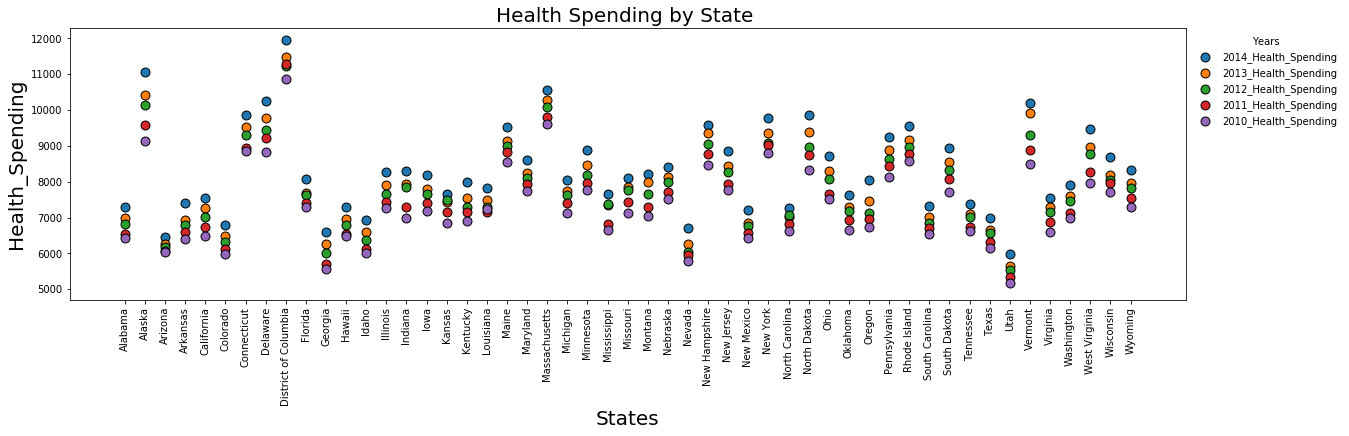

In [9]:
# Generate the Health Spending Plot by State

plt.figure(figsize=(20,5))
plt.title('Health Spending by State ', fontsize = 20)
plt.xlabel('States', fontsize = 20)
plt.ylabel('Health_Spending', fontsize = 20)

x_axis = np.arange(0, len(Health_spending_new))
plt.ylim = (0, 12000, 2000)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Health_spending_new.index, rotation=90)

[plt.scatter(x_axis, Health_spending_new[group], marker = "o", edgecolors="black", s=80) for group in Health_spending_new]

plt.legend(bbox_to_anchor=(1, 1), frameon=False, title="Years")
plt.savefig("HealthSpendingbyStats.png", bbox_inches='tight')

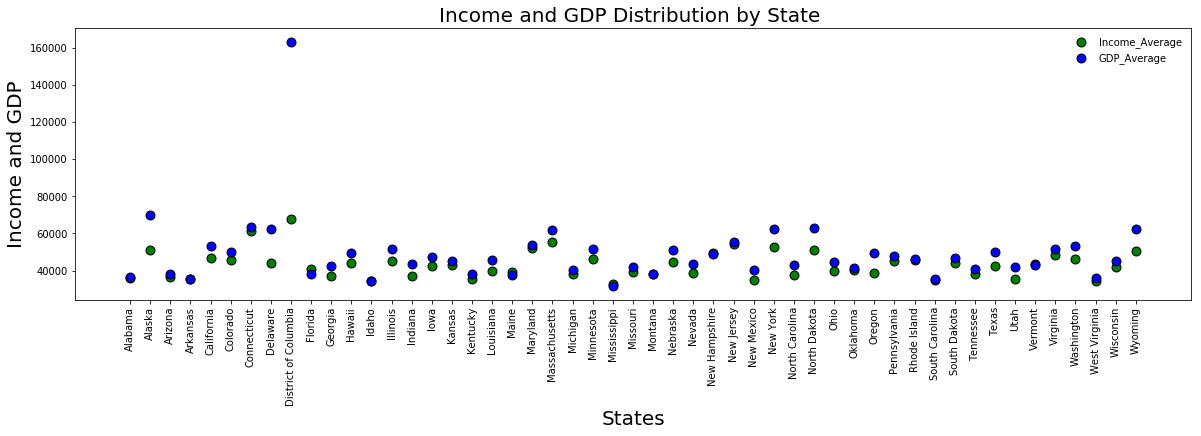

In [10]:
# Generate the Income GDP Plot by State

plt.figure(figsize=(20,5))
plt.title('Income and GDP Distribution by State ', fontsize = 20)
plt.xlabel('States', fontsize = 20)
plt.ylabel('Income and GDP', fontsize = 20)

x_axis = np.arange(0, len(Healthcare['Location']))
plt.ylim = (0,100)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Healthcare['Location'], rotation=90)

Income = plt.scatter(Healthcare['Location'], Healthcare['Income_Average'], marker = "o", edgecolors="black", facecolors='g', s=80)
GDP = plt.scatter(Healthcare['Location'], Healthcare['GDP_Average'], marker = "o", edgecolors="black",facecolors='b', s=80)

chart_legend = plt.legend(handles=(Income, GDP))
plt.legend(bbox_to_anchor=(1, 1), frameon=False)
plt.savefig("Income and GDP byStats.png", bbox_inches='tight')

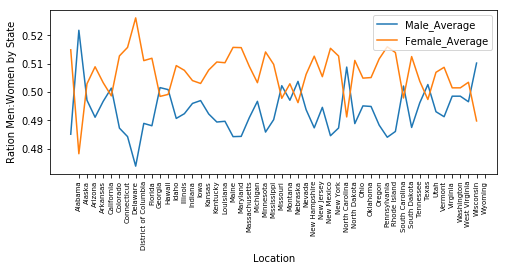

In [11]:
# Plot Male and Female Data by State

plt.figure(figsize=(8,3))
ax = plt.gca()
x=np.arange(1,52,1)
Healthcare.plot(kind='line',x='Location',y='Male_Average',ax=ax)
Healthcare.plot(kind='line',x='Location',y='Female_Average',ax=ax)
ax.set_xticks(x)
ax.set_xticklabels(Healthcare['Location'],rotation='vertical',fontsize=7)
plt.ylabel('Ration Men:Women by State')
plt.savefig("RationofMenandWomenbystate.png", bbox_inches='tight')

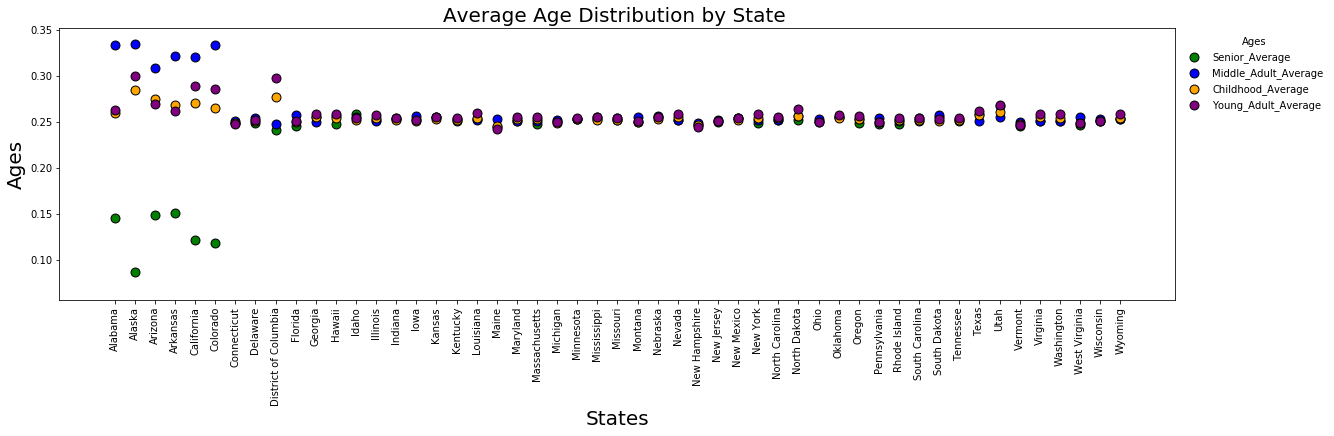

In [12]:
# Generate the Age Group Plot by State

plt.figure(figsize=(20,5))

plt.title('Average Age Distribution by State ', fontsize = 20)
plt.xlabel('States', fontsize = 20)
plt.ylabel('Ages', fontsize = 20)

x_axis = np.arange(0, len(Healthcare['Senior_Average']))
plt.ylim = (0,100)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Healthcare['Location'], rotation=90)

senior= plt.scatter(Healthcare['Location'], Healthcare['Senior_Average'], marker = "o", edgecolors="black", facecolors='g', s=80)
middle_adult = plt.scatter(Healthcare['Location'], Healthcare['Middle_Adult_Average'], marker = "o", edgecolors="black",facecolors='b', s=80)
childhood= plt.scatter(Healthcare['Location'], Healthcare['Childhood_Average'], marker = "o", edgecolors="black", facecolors='orange', s=80)
young_adult= plt.scatter(Healthcare['Location'], Healthcare['Young_Adult_Average'], marker = "o", edgecolors="black", facecolors='purple', s=80)

chart_legend = plt.legend(handles=(senior,middle_adult,childhood,young_adult))
plt.legend(bbox_to_anchor=(1, 1), frameon=False, title="Ages")
plt.savefig("AgesbyStats.png", bbox_inches='tight')

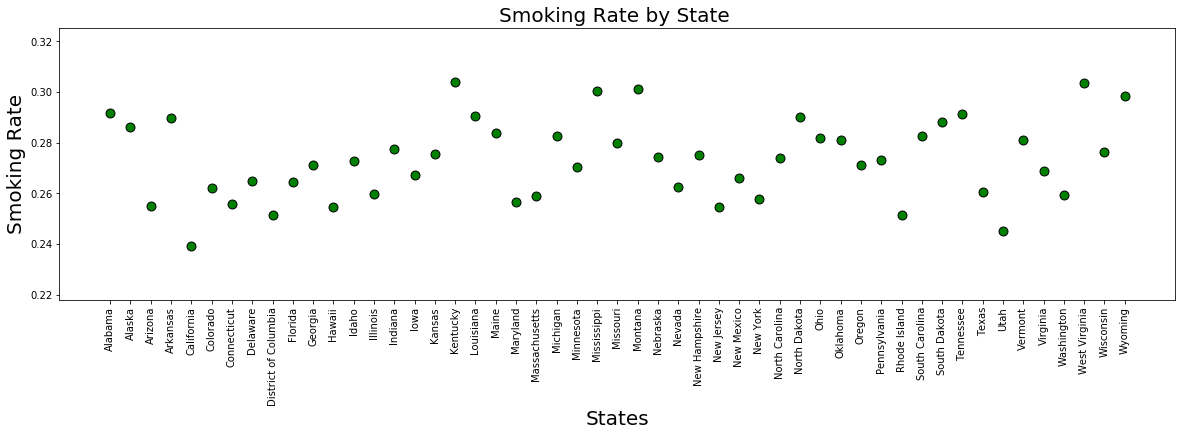

In [13]:
# Generate the Smoking Plot by State

plt.figure(figsize=(20,5))
plt.title('Smoking Rate by State ', fontsize = 20)
plt.xlabel('States', fontsize = 20)
plt.ylabel('Smoking Rate', fontsize = 20)

x_axis = np.arange(0, len(Healthcare['Location']))
plt.ylim = (0,100)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Healthcare['Location'], rotation=90)
Smoking = plt.scatter(Healthcare['Location'], Healthcare['Smoking_Average'], marker = "o", edgecolors="black", facecolors='g', s=80)
plt.savefig("Smoking byStats.png", bbox_inches='tight')

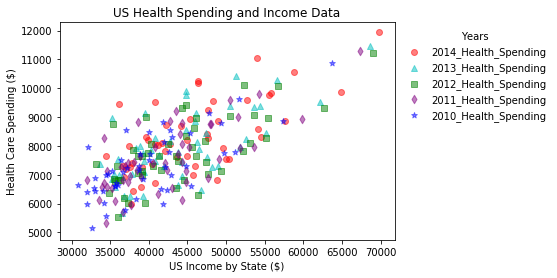

In [14]:
# Plot Health Spending and Income Data

data_2014 = plt.scatter(Healthcare['2014_Income'],Healthcare['2014_Health_Spending'], marker='o', facecolors='red',alpha=0.5)
data_2013 = plt.scatter(Healthcare['2013_Income'],Healthcare['2013_Health_Spending'],marker='^',facecolors='c',alpha=0.5)
data_2012 = plt.scatter(Healthcare['2012_Income'],Healthcare['2012_Health_Spending'],marker='s',facecolors='g',alpha=0.5)
data_2011 = plt.scatter(Healthcare['2011_Income'],Healthcare['2011_Health_Spending'],marker='d',facecolors='purple',alpha=0.5)
data_2010 = plt.scatter(Healthcare['2010_Income'],Healthcare['2010_Health_Spending'],marker='*',facecolors='b',alpha=0.5)

plt.title('US Health Spending and Income Data')
chart_legend = plt.legend(handles=[data_2014,data_2013,data_2012,data_2011,data_2010],fontsize=10)
chart_legend.legendHandles[0]._sizes = [25]
chart_legend.legendHandles[1]._sizes = [25]
chart_legend.legendHandles[2]._sizes = [25]
chart_legend.legendHandles[3]._sizes = [25]
chart_legend.legendHandles[4]._sizes = [25]
plt.xlabel('US Income by State ($)')
plt.ylabel('Health Care Spending ($)')
plt.legend(bbox_to_anchor=(1, 1), frameon=False, title="Years")
plt.savefig("HealthSpending and Income.png", bbox_inches='tight')

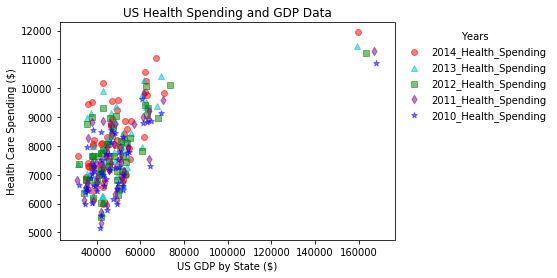

In [15]:
# plot Health Spending and GDP Data

data_2014 = plt.scatter(Healthcare['2014_GDP'],Healthcare['2014_Health_Spending'], marker='o', facecolors='red',alpha=0.5)
data_2013 = plt.scatter(Healthcare['2013_GDP'],Healthcare['2013_Health_Spending'],marker='^',facecolors='c',alpha=0.5)
data_2012 = plt.scatter(Healthcare['2012_GDP'],Healthcare['2012_Health_Spending'],marker='s',facecolors='g',alpha=0.5)
data_2011 = plt.scatter(Healthcare['2011_GDP'],Healthcare['2011_Health_Spending'],marker='d',facecolors='purple',alpha=0.5)
data_2010 = plt.scatter(Healthcare['2010_GDP'],Healthcare['2010_Health_Spending'],marker='*',facecolors='b',alpha=0.5)

plt.title('US Health Spending and GDP Data')
chart_legend = plt.legend(handles=[data_2014,data_2013,data_2012,data_2011,data_2010],fontsize=10)
chart_legend.legendHandles[0]._sizes = [25]
chart_legend.legendHandles[1]._sizes = [25]
chart_legend.legendHandles[2]._sizes = [25]
chart_legend.legendHandles[3]._sizes = [25]
chart_legend.legendHandles[4]._sizes = [25]
plt.xlabel('US GDP by State ($)')
plt.ylabel('Health Care Spending ($)')
plt.legend(bbox_to_anchor=(1, 1), frameon=False, title="Years")
plt.savefig("HealthSpending and GDP.png", bbox_inches='tight')

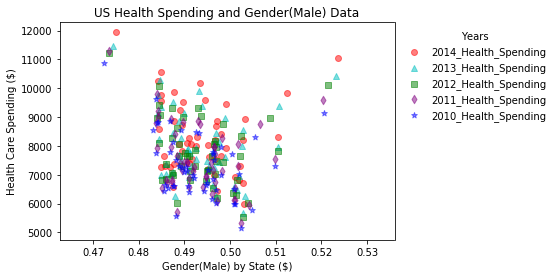

In [16]:
# Plot Health Spending and Gender(Male) Data

data_2014 = plt.scatter(Healthcare['2014_Male'],Healthcare['2014_Health_Spending'], marker='o', facecolors='red',alpha=0.5)
data_2013 = plt.scatter(Healthcare['2013_Male'],Healthcare['2013_Health_Spending'],marker='^',facecolors='c',alpha=0.5)
data_2012 = plt.scatter(Healthcare['2012_Male'],Healthcare['2012_Health_Spending'],marker='s',facecolors='g',alpha=0.5)
data_2011 = plt.scatter(Healthcare['2011_Male'],Healthcare['2011_Health_Spending'],marker='d',facecolors='purple',alpha=0.5)
data_2010 = plt.scatter(Healthcare['2010_Male'],Healthcare['2010_Health_Spending'],marker='*',facecolors='b',alpha=0.5)

plt.title('US Health Spending and Gender(Male) Data')
chart_legend = plt.legend(handles=[data_2014,data_2013,data_2012,data_2011,data_2010],fontsize=10)
chart_legend.legendHandles[0]._sizes = [25]
chart_legend.legendHandles[1]._sizes = [25]
chart_legend.legendHandles[2]._sizes = [25]
chart_legend.legendHandles[3]._sizes = [25]
chart_legend.legendHandles[4]._sizes = [25]
plt.xlabel('Gender(Male) by State ($)')
plt.ylabel('Health Care Spending ($)')
plt.legend(bbox_to_anchor=(1, 1), frameon=False, title="Years")
plt.savefig("HealthSpending and Male.png", bbox_inches='tight')

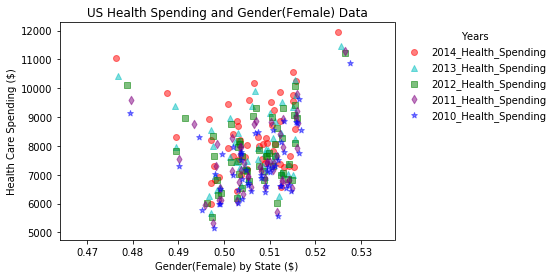

In [17]:
# Plot Health Spending and Gender(Female) Data

data_2014 = plt.scatter(Healthcare['2014_Female'],Healthcare['2014_Health_Spending'], marker='o', facecolors='red',alpha=0.5)
data_2013 = plt.scatter(Healthcare['2013_Female'],Healthcare['2013_Health_Spending'],marker='^',facecolors='c',alpha=0.5)
data_2012 = plt.scatter(Healthcare['2012_Female'],Healthcare['2012_Health_Spending'],marker='s',facecolors='g',alpha=0.5)
data_2011 = plt.scatter(Healthcare['2011_Female'],Healthcare['2011_Health_Spending'],marker='d',facecolors='purple',alpha=0.5)
data_2010 = plt.scatter(Healthcare['2010_Female'],Healthcare['2010_Health_Spending'],marker='*',facecolors='b',alpha=0.5)

plt.title('US Health Spending and Gender(Female) Data')
chart_legend = plt.legend(handles=[data_2014,data_2013,data_2012,data_2011,data_2010],fontsize=10)
chart_legend.legendHandles[0]._sizes = [25]
chart_legend.legendHandles[1]._sizes = [25]
chart_legend.legendHandles[2]._sizes = [25]
chart_legend.legendHandles[3]._sizes = [25]
chart_legend.legendHandles[4]._sizes = [25]
plt.xlabel('Gender(Female) by State ($)')
plt.ylabel('Health Care Spending ($)')
plt.legend(bbox_to_anchor=(1, 1), frameon=False, title="Years")
plt.savefig("HealthSpending and Female.png", bbox_inches='tight')

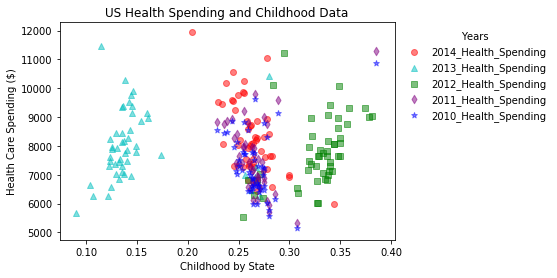

In [18]:
# Plot Health Spending and Childhood Data

data_2014 = plt.scatter(Healthcare['2014_Childhood'],Healthcare['2014_Health_Spending'], marker='o', facecolors='red',alpha=0.5)
data_2013 = plt.scatter(Healthcare['2013_Childhood'],Healthcare['2013_Health_Spending'],marker='^',facecolors='c',alpha=0.5)
data_2012 = plt.scatter(Healthcare['2012_Childhood'],Healthcare['2012_Health_Spending'],marker='s',facecolors='g',alpha=0.5)
data_2011 = plt.scatter(Healthcare['2011_Childhood'],Healthcare['2011_Health_Spending'],marker='d',facecolors='purple',alpha=0.5)
data_2010 = plt.scatter(Healthcare['2010_Childhood'],Healthcare['2010_Health_Spending'],marker='*',facecolors='b',alpha=0.5)

plt.title('US Health Spending and Childhood Data')
chart_legend = plt.legend(handles=[data_2014,data_2013,data_2012,data_2011,data_2010],fontsize=10)
chart_legend.legendHandles[0]._sizes = [25]
chart_legend.legendHandles[1]._sizes = [25]
chart_legend.legendHandles[2]._sizes = [25]
chart_legend.legendHandles[3]._sizes = [25]
chart_legend.legendHandles[4]._sizes = [25]
plt.xlabel('Childhood by State')
plt.ylabel('Health Care Spending ($)')
plt.legend(bbox_to_anchor=(1, 1), frameon=False, title="Years")
plt.savefig("HealthSpending and Childhood.png", bbox_inches='tight')

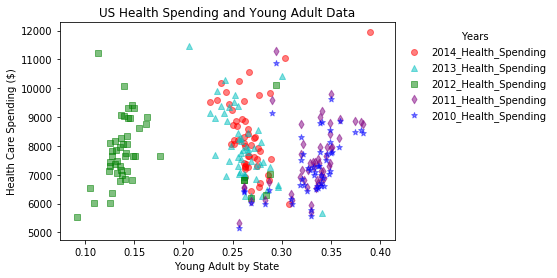

In [19]:
# Plot Health Spending and Young Adult Data

data_2014 = plt.scatter(Healthcare['2014_Young_Adult'],Healthcare['2014_Health_Spending'], marker='o', facecolors='red',alpha=0.5)
data_2013 = plt.scatter(Healthcare['2013_Young_Adult'],Healthcare['2013_Health_Spending'],marker='^',facecolors='c',alpha=0.5)
data_2012 = plt.scatter(Healthcare['2012_Young_Adult'],Healthcare['2012_Health_Spending'],marker='s',facecolors='g',alpha=0.5)
data_2011 = plt.scatter(Healthcare['2011_Young_Adult'],Healthcare['2011_Health_Spending'],marker='d',facecolors='purple',alpha=0.5)
data_2010 = plt.scatter(Healthcare['2010_Young_Adult'],Healthcare['2010_Health_Spending'],marker='*',facecolors='b',alpha=0.5)

plt.title('US Health Spending and Young Adult Data')
chart_legend = plt.legend(handles=[data_2014,data_2013,data_2012,data_2011,data_2010],fontsize=10)
chart_legend.legendHandles[0]._sizes = [25]
chart_legend.legendHandles[1]._sizes = [25]
chart_legend.legendHandles[2]._sizes = [25]
chart_legend.legendHandles[3]._sizes = [25]
chart_legend.legendHandles[4]._sizes = [25]
plt.xlabel('Young Adult by State')
plt.ylabel('Health Care Spending ($)')
plt.legend(bbox_to_anchor=(1, 1), frameon=False, title="Years")
plt.savefig("HealthSpending and Young Adult.png", bbox_inches='tight')

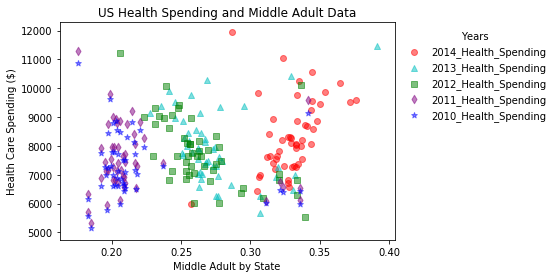

In [20]:
# Plot Health Spending and Middle Adult Data

data_2014 = plt.scatter(Healthcare['2014_Middle_Adult'],Healthcare['2014_Health_Spending'], marker='o', facecolors='red',alpha=0.5)
data_2013 = plt.scatter(Healthcare['2013_Middle_Adult'],Healthcare['2013_Health_Spending'],marker='^',facecolors='c',alpha=0.5)
data_2012 = plt.scatter(Healthcare['2012_Middle_Adult'],Healthcare['2012_Health_Spending'],marker='s',facecolors='g',alpha=0.5)
data_2011 = plt.scatter(Healthcare['2011_Middle_Adult'],Healthcare['2011_Health_Spending'],marker='d',facecolors='purple',alpha=0.5)
data_2010 = plt.scatter(Healthcare['2010_Middle_Adult'],Healthcare['2010_Health_Spending'],marker='*',facecolors='b',alpha=0.5)

plt.title('US Health Spending and Middle Adult Data')
chart_legend = plt.legend(handles=[data_2014,data_2013,data_2012,data_2011,data_2010],fontsize=10)
chart_legend.legendHandles[0]._sizes = [25]
chart_legend.legendHandles[1]._sizes = [25]
chart_legend.legendHandles[2]._sizes = [25]
chart_legend.legendHandles[3]._sizes = [25]
chart_legend.legendHandles[4]._sizes = [25]
plt.xlabel('Middle Adult by State')
plt.ylabel('Health Care Spending ($)')
plt.legend(bbox_to_anchor=(1, 1), frameon=False, title="Years")
plt.savefig("HealthSpending and Middle Adult.png", bbox_inches='tight')

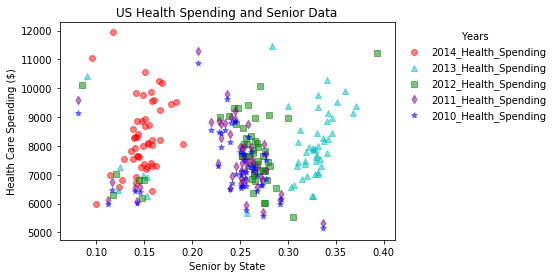

In [21]:
# Plot Health Spending and Senior Data

data_2014 = plt.scatter(Healthcare['2014_Senior'],Healthcare['2014_Health_Spending'], marker='o', facecolors='red',alpha=0.5)
data_2013 = plt.scatter(Healthcare['2013_Senior'],Healthcare['2013_Health_Spending'],marker='^',facecolors='c',alpha=0.5)
data_2012 = plt.scatter(Healthcare['2012_Senior'],Healthcare['2012_Health_Spending'],marker='s',facecolors='g',alpha=0.5)
data_2011 = plt.scatter(Healthcare['2011_Senior'],Healthcare['2011_Health_Spending'],marker='d',facecolors='purple',alpha=0.5)
data_2010 = plt.scatter(Healthcare['2010_Senior'],Healthcare['2010_Health_Spending'],marker='*',facecolors='b',alpha=0.5)

plt.title('US Health Spending and Senior Data')
chart_legend = plt.legend(handles=[data_2014,data_2013,data_2012,data_2011,data_2010],fontsize=10)
chart_legend.legendHandles[0]._sizes = [25]
chart_legend.legendHandles[1]._sizes = [25]
chart_legend.legendHandles[2]._sizes = [25]
chart_legend.legendHandles[3]._sizes = [25]
chart_legend.legendHandles[4]._sizes = [25]
plt.xlabel('Senior by State')
plt.ylabel('Health Care Spending ($)')
plt.legend(bbox_to_anchor=(1, 1), frameon=False, title="Years")
plt.savefig("HealthSpending and Senior.png", bbox_inches='tight')

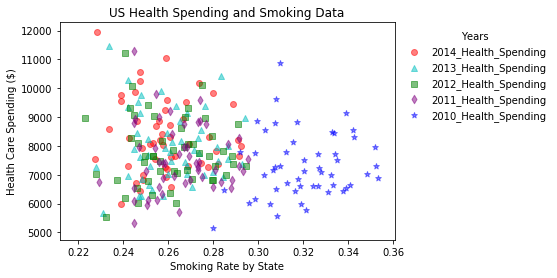

In [22]:
# Plot Health Spending and Smoking Data

data_2014 = plt.scatter(Healthcare['2014_Smoking'],Healthcare['2014_Health_Spending'], marker='o', facecolors='red',alpha=0.5)
data_2013 = plt.scatter(Healthcare['2013_Smoking'],Healthcare['2013_Health_Spending'],marker='^',facecolors='c',alpha=0.5)
data_2012 = plt.scatter(Healthcare['2012_Smoking'],Healthcare['2012_Health_Spending'],marker='s',facecolors='g',alpha=0.5)
data_2011 = plt.scatter(Healthcare['2011_Smoking'],Healthcare['2011_Health_Spending'],marker='d',facecolors='purple',alpha=0.5)
data_2010 = plt.scatter(Healthcare['2010_Smoking'],Healthcare['2010_Health_Spending'],marker='*',facecolors='b',alpha=0.5)

plt.title('US Health Spending and Smoking Data')
chart_legend = plt.legend(handles=[data_2014,data_2013,data_2012,data_2011,data_2010],fontsize=10)
chart_legend.legendHandles[0]._sizes = [25]
chart_legend.legendHandles[1]._sizes = [25]
chart_legend.legendHandles[2]._sizes = [25]
chart_legend.legendHandles[3]._sizes = [25]
chart_legend.legendHandles[4]._sizes = [25]
plt.xlabel('Smoking Rate by State')
plt.ylabel('Health Care Spending ($)')
plt.legend(bbox_to_anchor=(1, 1), frameon=False, title="Years")
plt.savefig("HealthSpending and Smoking.png", bbox_inches='tight')

In [23]:
# Linear Regression Statistic Model Analysis

x_axis = [Smoking_mean, Income_mean, GDP_mean, Male_mean, Female_mean, Childhood_mean,\
         Young_Adult_mean, Middle_Adult_mean, Senior_mean]
y = Health_Spending_mean

for x in x_axis:
    model = ols("y ~ x", Healthcare).fit()
    print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                  0.001589
Date:                Wed, 12 Sep 2018   Prob (F-statistic):              0.968
Time:                        15:08:26   Log-Likelihood:                -432.57
No. Observations:                  51   AIC:                             869.1
Df Residuals:                      49   BIC:                             873.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7670.7367   2926.803      2.621      0.0

In [24]:
# Multi-linear Regression Analysis

import statsmodels.formula.api as smf
model = smf.ols(formula='Health_Spending_Average ~ Income_Average + GDP_Average', data=Healthcare)
results_formula = model.fit()
results_formula.params

Intercept         3318.977768
Income_Average       0.090540
GDP_Average          0.011463
dtype: float64

In [25]:
# Import Axes3Dimport 

import importlib
importlib.import_module('mpl_toolkits.mplot3d').Axes3D

mpl_toolkits.mplot3d.axes3d.Axes3D

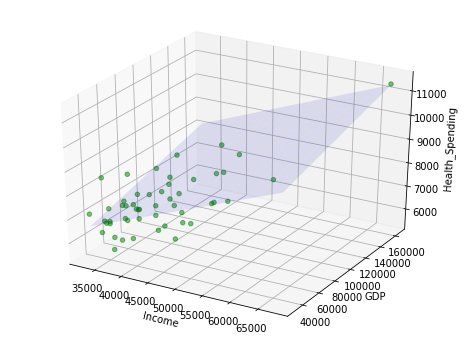

In [26]:
# Make 3D linear Regression Model

x_surf, y_surf= np.meshgrid(np.linspace(Healthcare.Income_Average.min(), Healthcare.Income_Average.max(), 1000),\
                             np.linspace(Healthcare.GDP_Average.min(), Healthcare.GDP_Average.max(), 1000))
onlyX = pd.DataFrame({'Income_Average':x_surf.ravel(), 'GDP_Average':y_surf.ravel()})
fittedY = results_formula.predict(exog=onlyX)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Healthcare['Income_Average'], Healthcare['GDP_Average'], Healthcare['Health_Spending_Average'],\
          c='green', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, fittedY.values.reshape(x_surf.shape), color='blue', alpha=0.1)
ax.set_xlabel('Income')
ax.set_ylabel('GDP')
ax.set_zlabel('Health_Spending')
plt.savefig("Income GDP Health_Spending 3D.png")

In [27]:
# results_formula.predict(df_new)